# MMS quaternion coordinate transformations

This notebook demonstrates how to transform vectors using the MMS MEC quaternions

Internally, the transformations are done by routines inside SpacePy (https://spacepy.github.io/)

This command sets up the PySPEDAS environment when running in Google Colab.  You can skip it or comment it out if you're running this notebook in an environment that already has PySPEDAS installed.


In [2]:
!pip install pyspedas


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


We'll also need to install SpacePy to get started.  SpacePy is not installed by default when you install PySPEDAS.  For more information, see https://spacepy.github.io/

In [3]:
!pip install spacepy


[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


Import PySPEDAS and load some MMS MEC data for October 16, 2015

In [4]:
import pyspedas

In [5]:
pyspedas.projects.mms.mec()

01-Feb-25 12:41:20: Loading pydata/mms1/mec/srvy/l2/epht89q/2015/10/mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf


['mms1_mec_dipole_tilt',
 'mms1_mec_gmst',
 'mms1_mec_mlat',
 'mms1_mec_mlt',
 'mms1_mec_l_dipole',
 'mms1_mec_quat_eci_to_bcs',
 'mms1_mec_quat_eci_to_dbcs',
 'mms1_mec_quat_eci_to_dmpa',
 'mms1_mec_quat_eci_to_smpa',
 'mms1_mec_quat_eci_to_dsl',
 'mms1_mec_quat_eci_to_ssl',
 'mms1_mec_L_vec',
 'mms1_mec_Z_vec',
 'mms1_mec_P_vec',
 'mms1_mec_L_phase',
 'mms1_mec_Z_phase',
 'mms1_mec_P_phase',
 'mms1_mec_kp',
 'mms1_mec_dst',
 'mms1_mec_earth_eclipse_flag',
 'mms1_mec_moon_eclipse_flag',
 'mms1_mec_r_eci',
 'mms1_mec_v_eci',
 'mms1_mec_r_gsm',
 'mms1_mec_v_gsm',
 'mms1_mec_quat_eci_to_gsm',
 'mms1_mec_r_geo',
 'mms1_mec_v_geo',
 'mms1_mec_quat_eci_to_geo',
 'mms1_mec_r_sm',
 'mms1_mec_v_sm',
 'mms1_mec_quat_eci_to_sm',
 'mms1_mec_r_gse',
 'mms1_mec_v_gse',
 'mms1_mec_quat_eci_to_gse',
 'mms1_mec_r_gse2000',
 'mms1_mec_v_gse2000',
 'mms1_mec_quat_eci_to_gse2000',
 'mms1_mec_geod_lat',
 'mms1_mec_geod_lon',
 'mms1_mec_geod_height',
 'mms1_mec_r_sun_de421_eci',
 'mms1_mec_r_moon_de421_eci

Import `mms_qcotrans` (the quaternion transformation routine)

In [6]:
from pyspedas.projects.mms import mms_qcotrans

Now transform the MMS velocity data from GEO coordinates to SM coordinates. 

The first argument to `mms_qcotrans` is the name of the variable containing the vector data to be transformed; the second argument is the output variable name. If the `in_coord` keyword isn't specified, we'll try to determine it from the input variable's metadata. The `out_coord` keyword is required. 

In [7]:
mms_qcotrans('mms1_mec_v_geo', 'mms1_mec_v_geo_2sm', out_coord='sm')

['mms1_mec_v_geo_2sm']

In [8]:
from pyspedas import tplot

Now we can compare the official velocity data in SM coordinates (first panel) with velocity data we just transformed from the GEO data (second panel) and the original velocity data in GEO coordinates (last panel).

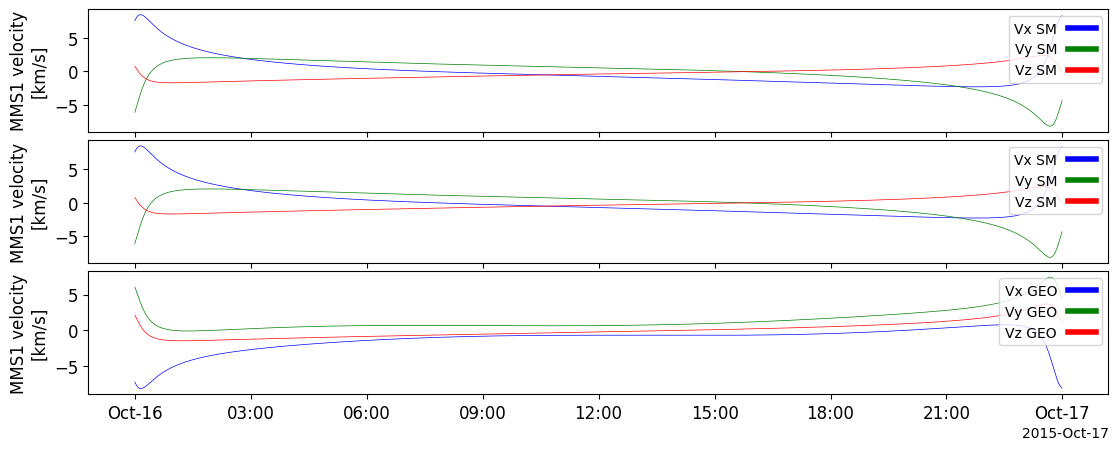

In [9]:
tplot(['mms1_mec_v_sm', 'mms1_mec_v_geo_2sm', 'mms1_mec_v_geo'])

We can easily transform to GSM coordinates

In [10]:
mms_qcotrans('mms1_mec_v_geo', 'mms1_mec_v_geo_2gsm', out_coord='gsm')

['mms1_mec_v_geo_2gsm']

Now we can do the same comparison as last time: the official velocity data are shown in GSM coordinates (first panel) with velocity data we just transformed from the GEO data (second panel) and the original velocity data in GEO coordinates (last panel).

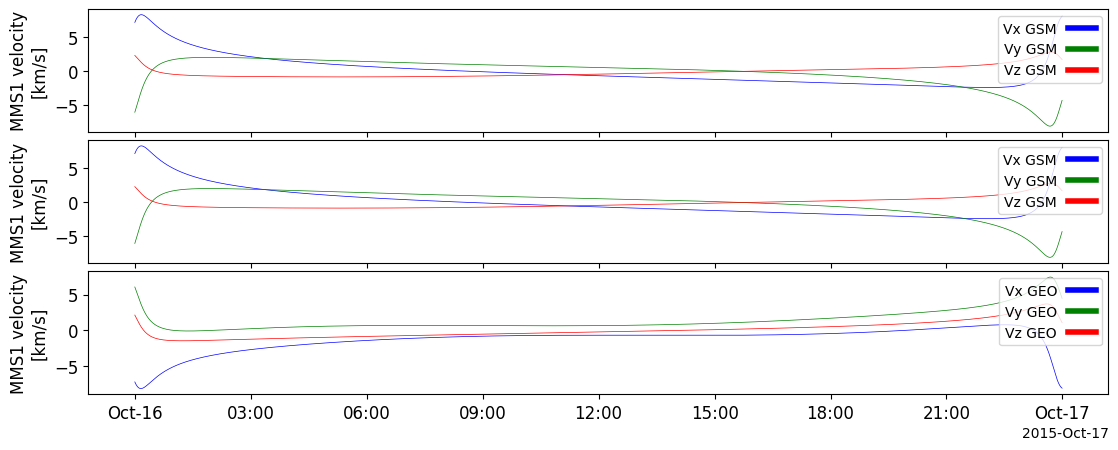

In [11]:
tplot(['mms1_mec_v_gsm', 'mms1_mec_v_geo_2gsm', 'mms1_mec_v_geo'])

And we can transform to GSE:

In [12]:
mms_qcotrans('mms1_mec_v_geo', 'mms1_mec_v_geo_2gse', out_coord='gse')

['mms1_mec_v_geo_2gse']

Note: same comparison as above. The transformed data match the official data.

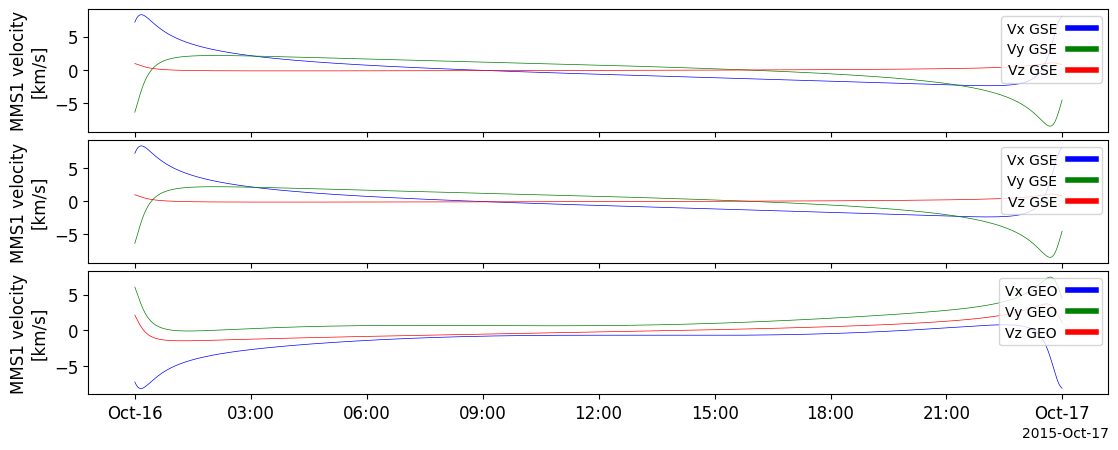

In [13]:
tplot(['mms1_mec_v_gse', 'mms1_mec_v_geo_2gse', 'mms1_mec_v_geo'])